FPL Shirt Numbers


The goal of this project is to look into the relationship between shirt number and performance for soccer players. Shirt numbers universally present in all teams across the world, and most sports. Soccer has a unique relationship with shirt numbers which can be attributed to the evolution of the sport and its shifting formations. 

For example, with 11 starting players per team, the numbers 1-11 are very common and generally have "assigned" positions. Generally, the goalkeeper is #1, right back is #2, left back #3, midfielders/defenders #4-#8, and attackers #9, #10, #11. Lionel Messi and Diego Maradona were fluid attacking #10s, #7 usually falls to dynamic wingers like Cristiano Ronaldo and Heung-Min Son, and the classic striker a la Alan Shearer or Robert Lewandoski wear the #9. Different leagues have slight tweaks to the numbers which are allowed or encouraged, so its more common to see a shirt like #00 or #95 in Italy then England. 

One hypothesis of this Exploratory Data Analysis is that shirt number will directly correlate with performance. One possible source of match performance will be the popular Fantasy Premier League game where points are awarded for on-field performances. While it is true that the "lower" numbers are more coveted, and thus the better players will get their pick of the lower numbers, seeing this hypothesis confirmed may lead to interesting outliers who are found. 

Another hypothesis will be to predict the future performances of players based on shirt number. For example, youth players who are assigned "higher" numbers may perform well enough to warrant picking a new number for the following season, which may lead to intersting performance timelines relative to shirt numbers. 

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
from collections import defaultdict


In [3]:
master_teams = pd.read_csv('data/master_team_list.csv')
raw16 = pd.read_csv('data/2016-17/players_raw.csv')
raw17 = pd.read_csv('data/2017-18/players_raw.csv')
raw18 = pd.read_csv('data/2018-19/players_raw.csv')
raw19 = pd.read_csv('data/2019-20/players_raw.csv')
raw20 = pd.read_csv('data/2020-21/players_raw.csv')
raw21 = pd.read_csv('data/2021-22/players_raw.csv')


In [26]:
raw18

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,3,130,100,100,1,11334,0,0,-3,...,0.0,24,83497,0,136211,0,0.0,5.1,Cech,0
1,0,5,568,None,None,6,80201,0,0,-1,...,0.0,106,339095,0,250834,0,0.7,21.6,Leno,0
2,0,8,319,100,100,3,51507,0,0,-1,...,105.0,62,128478,0,92187,0,0.4,11.5,Koscielny,1
3,5,5,304,0,0,4,98745,0,0,-2,...,280.0,60,567084,0,1143684,0,0.0,11.3,Bellerín,3
4,4,7,392,100,100,5,38411,0,0,-1,...,224.0,77,298216,0,290921,0,0.5,14.3,Monreal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,1,209,100,100,3,151589,0,0,-2,...,288.0,48,63174,0,59242,0,0.7,11.2,Dendoncker,1
620,0,0,0,0,0,0,123354,0,0,0,...,0.0,0,20611,0,20565,0,0.0,0.0,Hause,0
621,0,0,0,None,None,0,232351,0,0,0,...,0.0,0,2498,0,1662,0,0.0,0.0,Giles,0
622,0,0,3,None,None,0,214048,0,0,0,...,0.0,1,4267,0,2391,0,0.1,0.3,Kilman,0


In [4]:
print(raw16.columns)

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')


In [5]:
position_dict = {1: 'Goalkeeper', 2: 'Defender', 3: 'Midfielder', 4: 'Foward'}
team_dict = defaultdict(dict)
for i, row in master_teams.iterrows():
    team_dict[row.season][row.team] = row.team_name

In [31]:
def clean_df(df, season):
    cleaned = df[['web_name', 'first_name', 'team', 'element_type', 'squad_number', 'total_points', 'minutes', 'points_per_game', 'now_cost']]
    cleaned.replace({'element_type': position_dict}, inplace=True)
    cleaned.replace({'team': team_dict[season]}, inplace=True)
    cleaned['squad_number'] = cleaned['squad_number'].replace('None', 0)
    cleaned = cleaned.loc[cleaned['squad_number']!=0]
    cleaned['squad_number'] = cleaned['squad_number'].astype(str).astype(int)
    cleaned.columns = ['Last Name', 'First Name', 'Team', 'Position', 'Squad Number', 'Points', 'Minutes', 'Points per Game', 'Final Cost']
    return cleaned

In [33]:
cleaned16 = clean_df(raw16, '2016-17')
cleaned17 = clean_df(raw17, '2017-18')
cleaned18 = clean_df(raw18, '2018-19')
cleaned19 = clean_df(raw19, '2019-20')
cleaned20 = clean_df(raw20, '2020-21')
cleaned21 = clean_df(raw21, '2021-22')
cleaned16

,Last Name,First Name,Team,Position,Squad Number,Points,Minutes,Points per Game,Final Cost
0,Ospina,David,Arsenal,Goalkeeper,13,2,143,1.0,47
1,Cech,Petr,Arsenal,Goalkeeper,33,134,3097,3.8,54
2,Koscielny,Laurent,Arsenal,Defender,6,121,2821,3.7,61
3,Mertesacker,Per,Arsenal,Defender,4,1,38,1.0,48
4,Gabriel,Gabriel Armando,Arsenal,Defender,5,45,1517,2.4,48
...,...,...,...,...,...,...,...,...,...
678,Surridge,Sam,Bournemouth,Foward,44,0,0,0.0,45
679,Gomes,Angel,Man Utd,Midfielder,47,1,3,1.0,45
680,O'Hara,Kieran,Man Utd,Goalkeeper,47,0,0,0.0,40
681,Tremmel,Gerhard,Swansea,Goalkeeper,25,0,0,0.0,40


First lets look at the distribution of squad numbers, both in team and in general

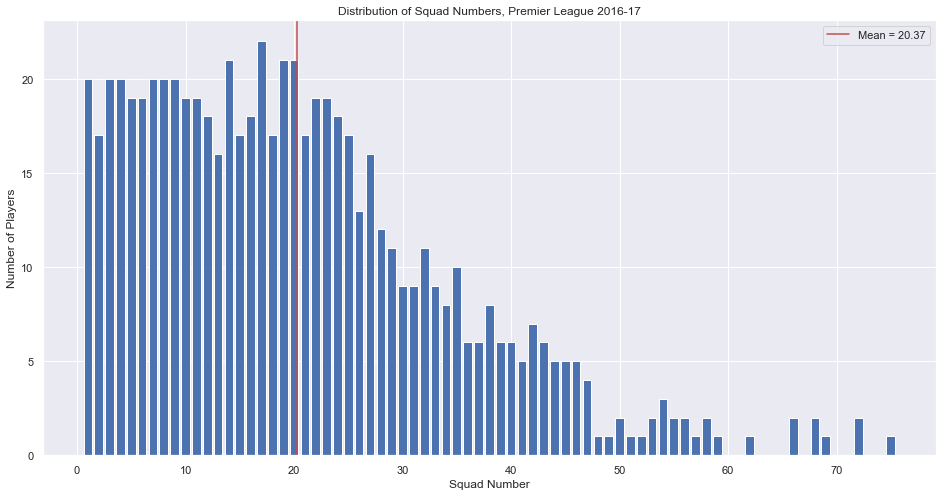

In [35]:
all_teams_dist = cleaned16.groupby(['Squad Number'])['Last Name'].count()
all_teams_dist = cleaned16.groupby(['Squad Number'])['Last Name'].count()
plt.figure(figsize=(16,8));
plt.bar(all_teams_dist.index, all_teams_dist);
plt.axvline(x=20.25, color='r')
plt.legend(['Mean = %.2f' % cleaned16['Squad Number'].mean()])
plt.title('Distribution of Squad Numbers, Premier League 2016-17');
plt.xlabel('Squad Number');
plt.ylabel('Number of Players');

An expected distribution appears showing the majority of players taking numbers below 30. The first unpicked number is 60, and the mean is 20.25

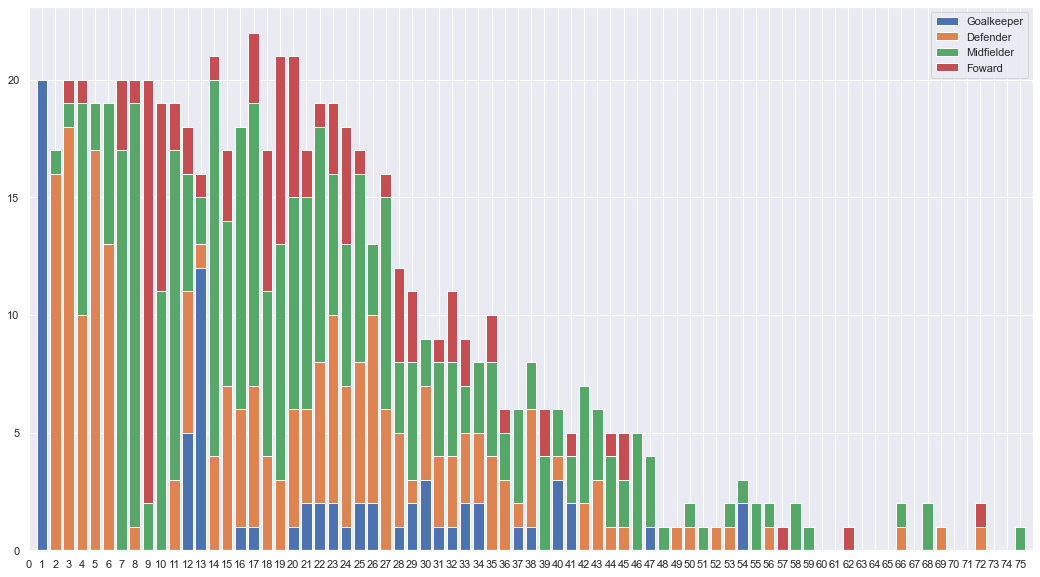

In [38]:
pos_dist = cleaned16.groupby(['Squad Number', 'Position'], as_index=False)['Last Name'].count()
plt.figure(figsize=(18, 10));
max_num = cleaned16.sort_values(by='Squad Number').iloc[-1,4]
bottom = [0 for i in range(max_num+1)]
for pos in position_dict.values():
    top = [0 for i in range(max_num+1)]
    df = pos_dist.loc[pos_dist['Position']==pos]
    squad_num = df['Squad Number'].reset_index(drop=True)
    count = df['Last Name'].reset_index(drop=True)
    for i in range(len(squad_num)):
        top[squad_num[i]] = count[i]
    plt.bar(range(len(top)), top, bottom=bottom);
    bottom = [sum(x) for x in zip(top, bottom)]
plt.legend(position_dict.values());
plt.xticks(np.arange(0, max_num+1, 1));
plt.xlim([0,max_num+1]);

In [162]:
sum_points = cleaned16.groupby(['Squad Number', 'Position'], as_index=False)['Points'].sum()
sum_points = sum_points.sort_values(by=['Squad Number'], ascending=True)
print(sum_points.to_string())

     Squad Number    Position  Points
0               0    Defender       0
1               0      Foward       0
2               0  Midfielder       0
3               1  Goalkeeper    1452
4               2    Defender    1003
5               2  Midfielder      37
6               3    Defender    1304
7               3      Foward      39
8               3  Midfielder      29
11              4  Midfielder     479
9               4    Defender     386
10              4      Foward      52
12              5    Defender     933
13              5  Midfielder     203
14              6    Defender     976
15              6  Midfielder     251
17              7  Midfielder    1317
16              7      Foward     204
20              8  Midfielder    1064
19              8      Foward       6
18              8    Defender      56
21              9      Foward    1248
22              9  Midfielder     127
23             10      Foward    1001
24             10  Midfielder    1018
25          

pos_dist = cleaned16.groupby(['Squad Number', 'Position'], as_index=False)['Last Name'].count()

gk_dist = pos_dist.loc[pos_dist['Position']=='Goalkeeper']
def_dist = pos_dist.loc[pos_dist['Position']=='Defender']

for pos in 

print(def_dist)
# print(pos_dist.to_string())
plt.figure(figsize=(18, 10));
# plt.bar(pos_dist.loc[pos_dist['Squad Number'], pos_dist['Last Name'])
plt.bar(gk_dist['Squad Number'], gk_dist['Last Name'])


To Do
 - look at all mean, median, etc of squad numbers
 - look at season trending performances of squad numbers
 - look to "weight" squad numbers based on team overall performance, i.e. which squad numbers perform best regardless of team performance
 -